## Generala
We come back to the Generala game used in the Problem 1 of the last class.

+ Imports, class definitions and auxiliary functions *"To do all this you can just import libraries for plotting and getting random numbers".*

In [1]:
import random
import matplotlib.pyplot as plt

def dec2hex(num):
    try:
        num=int(num)
    except:
        print("expecting an integer, obtained", num, "in function dec2hex")
    if num == 0:
        return "0"
    ans = ""
    while num > 0:
        ans = str(num%6) + ans
        num //= 6
    return (ans)

class lnk_chose_path:
    """Its a linked structure in wich, from any position (n dice 
    combination), you can "choose path" (choose the next posible output)
    Basically a tree."""
    def __init__(self, data, childs=list()):
        self.data = data
        self.childs = childs

class dice_pres(lnk_chose_path):
    """A lnk_chose_path aplied to the possible results for a dice
    The number of childs for each node must be either 6 or 0 for the model
    to have sense"""
    
    def build_n_layers(self,n):
        self.childs = [] # if there were already childs, remove them
        giben_dices = self.data
        if not giben_dices:
            giben_dices = []
        if n>0:
            for res in range(6):
                self.childs.append(dice_pres(giben_dices+[res+1]))
                self.childs[-1].build_n_layers(n-1)
        self.n = n
            
    def __getitem__(self, request):
        """Converts the key/index into base 6, then uses each digit to 
        chose the path, does not include root data"""
        try:
            key, n = request
        except:
            key = request
            n = self.n
        current_pos = self
        key = dec2hex(key)
        while len(key)<n:
            key = "0"+key
        for digit in key:
            current_pos=current_pos.childs[int(digit)]
        return(current_pos.data)
    def __iter__(self):
        return(dice_press_iter(self))

class dice_press_iter:
    def __init__(self, dice_pres):
        self.dice_pres = dice_pres
        self._index = 0
        try:
            self.n = dice_pres.n
        except:
            raise StopIteration
            
    def __next__(self):
        """Returns the next value from team object's lists """
        self._index +=1
        try:
            return self.dice_pres[self._index-1, self.n]
        except:
            # End of Iteration
            raise StopIteration

1. Write a function that list all the possible outcomes with five dice.
2. Write a function that takes a number of dices and return all the possible outcomes for

In [2]:
def get_posible_outcomes(n=5):
    """Exercises 1 and 2; since exercice 2 is a generalitzation of 
    exercise 1, its soluton includes the solution to exercise 1"""
    pos_outcomes = dice_pres(0)
    pos_outcomes.build_n_layers(n)
    return pos_outcomes # It is not a list as I gess it was expected but
    # a tree. This alternative representation can be acces and traversed
    # similarly* to a list while will be slighly slower to do so. On the other 
    # hand, should be kiquer to create and more space eficient.
    # It also probides an intuitive way to locate the possible final 
    # outcomes for those cases with giben partial results.
    # *notice that [index, number_of_dices] can be used, in wich case only a part of the tree will be used.

3. Write functions that return, given five dice, **True** or **False** if we have Straight, Full, Poker or Generala.

In [3]:
def is_Straight(res):
    """Assumes it is giben a list with 5 numbers from the dice results"""
    setres = set(res)
    if len(setres)==5:
        return(True)
    return(False)

def is_Generala(res):
    """Assumes it is giben a list with 5 numbers from the dice results"""
    setres = set(res)
    if len(setres)==1:
        return(True)
    return(False)

def is_Poker(res):
    """Assumes it is giben a list with 5 numbers from the dice results"""
    setres = set(res)
    if len(setres)==2:
        if res.count(res[0]) in {1,4}:
            return(True)
    return(False)

def is_Full(res):
    """Assumes it is giben a list with 5 numbers from the dice results"""
    setres = set(res)
    if len(setres)==2:
        if res.count(res[0]) in {2,3}:
            return(True)
    return(False)


4. Compute the probabilities that you already computed by hand by counting the outcomes describing each roll result in the list of all possible hands ***served***.

In [4]:
def served_out_counter():
    all_pos_out = get_posible_outcomes(5) # some counted outputs (Poker and Full) are not defined for 
    t,S,G,P,F=[0]*5                       # a dice number different than 5
    for outcome in all_pos_out:
        t+=1
        if is_Straight(outcome):
            S+=1
        elif is_Generala(outcome):
            G+=1
        elif is_Poker(outcome):
            P+=1
        elif is_Full(outcome):
            F+=1
    print("Generala probability:",G/t) 
    print("Straight probability:",S/t)
    print("Poker probability:",P/t)
    print("Full probability:",F/t)
served_out_counter()

Generala probability: 0.0007716049382716049
Straight probability: 0.09259259259259259
Poker probability: 0.019290123456790122
Full probability: 0.038580246913580245


5. Compute the probabilities that you already computed by hand by counting the outcomes describing each roll result in the list of all possible hands.

In [5]:
def out_counter(n_rounds=3):
    """Warning: High computation time, aprox 2.6 min per round in my computer"""
    round_pos_out = [i for i in get_posible_outcomes(5)] # converting tree into a list
    current_round_pos_out = {tuple(i):1 for i in round_pos_out}
    
    ### Geting posible outcomes for n dices: # if we were geting this results each time needed, computation 
    # time would raise to aproximately 20 min / round
    possible_out_nd = [[],]# with zero dices,0 results
    for i in range(5):
        possible_out_nd.append([i for i in get_posible_outcomes(i+1)])
    
    
    
    for round in range(n_rounds-1):
        last_round_pos_out = current_round_pos_out
        current_round_pos_out = {tuple(i):0 for i in round_pos_out}
        for output in last_round_pos_out:
            #print(output)
            if last_round_pos_out[output]==0: # not going to happen but to be complete
                continue  
            for _subset in range(2**5):
                
                subset = list(str(bin(_subset+32)[3:])) # adding 32 I make all numbers to follow the format 0b1+5[0,1]
                # as I'm intrested on the 5[0,1] I cut the first 3 characters
                
                keep_dices = [output[dice] for dice in range(5) if subset[dice]=="1"]
                
                new_results = possible_out_nd[5-len(keep_dices)]
                
                if len(new_results)==0:
                    new_results = [[],]
                    
                timesper_output = 6**5/len(new_results) # as I assume each subset to have the same probability, each subset must 
                # contribute with the same ammount of results: 6**5 (the max different cases when rolling all dices)
                
                for output in [keep_dices + newd for newd in new_results]:
                    current_round_pos_out[tuple(output)] += timesper_output * last_round_pos_out[tuple(output)]
                
            #print("   end output")
            # arround 0.15s per output -> 19 min/round.
           
    
    t,S,G,P,F=[0]*5
    for outcome in current_round_pos_out:
        t+=1
        if is_Straight(outcome):
            S+=1
        elif is_Generala(outcome):
            G+=1
        elif is_Poker(outcome):
            P+=1
        elif is_Full(outcome):
            F+=1
    print("Generala probability:",G/t) 
    print("Straight probability:",S/t)
    print("Poker probability:",P/t)
    print("Full probability:",F/t)
    
out_counter(3)

Generala probability: 0.0007716049382716049
Straight probability: 0.09259259259259259
Poker probability: 0.019290123456790122
Full probability: 0.038580246913580245


6. Write a function that simulate a roll with n fair dices.

In [6]:
def generala_round(prev=False, keep=False, n=5):
    if prev==False:
        prev = [0]*n
    if keep==False:
        keep = [0]*n
    for dice in range(len(prev)):
        if not keep[dice]:
            prev[dice]= random.randint(1,6)
    return prev

7. Write a function that plays automatically, always looking for a Generala with a greedy strategy (always keeping the most dices of the same kind and rolling the others) that returns **True** if we get a Generala and a **False** otherwise. Which kind of distribution follow this function results? Explain your reasoning within the delivered python notebook.

In [7]:
def GenGreedy_player():
    round_results = generala_round()
    for i in range(2):
        number_repeats = [round_results.count(i) for i in round_results]
        most_rep = max([round_results[i] for i in range(len(round_results)) if number_repeats[i]==max(number_repeats)])
        to_keep = [most_rep==x for x in round_results]
        #print(round_results, to_keep)
        round_results = generala_round(round_results, to_keep)
    #print(round_results)
    return(is_Generala(round_results))

It will follow a bernoulli distribution because it only has two possible outputs: True or False.

8. Write a function that plays until it gets a Generala, count how many times it had to play to get it and return this number. Which kind of distribution follow this function results? Explain your reasoning within the delivered python notebook.

In [8]:
def Compulsive_GenGreedy_player():
    round_results = generala_round()
    n = 0
    while is_Generala(round_results) == False:
        n+=1
        number_repeats = [round_results.count(i) for i in round_results]
        most_rep = max([round_results[i] for i in range(len(round_results)) if number_repeats[i]==max(number_repeats)])
        to_keep = [most_rep==x for x in round_results]
        #print(round_results, to_keep)
        round_results = generala_round(round_results, to_keep)
    #print(round_results)
    return(n)

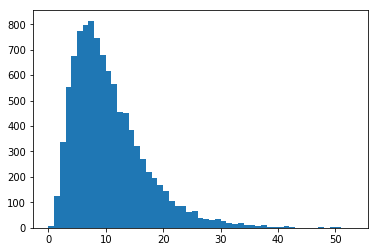

In [9]:
res = []
for i in range(10000):
    res.append(Compulsive_GenGreedy_player())
plt.hist(res, bins=max(res))
plt.show()

Follows a poison distribution. It does so because the posible outcomes are discrete and bounded at 0.

## All this work arround a game and no place to play it? Not in my notebook

### Bots + real player functions

In [10]:

def R_GenGreedy_player(play, n): # just GenGreedy_player returning the results instead of true/false
    round_results = generala_round()
    print("GenGreedy_player got",round_results)
    if play.asses_generala_result(round_results)[1]=="Generala":
        return(asses_generala_result(round_results)[0]+5, round_results)
    for i in range(2):
        number_repeats = [round_results.count(i) for i in round_results]
        most_rep = max([round_results[i] for i in range(len(round_results)) if number_repeats[i]==max(number_repeats)])
        to_keep = [most_rep==x for x in round_results]
        #print(round_results, to_keep)
        round_results = generala_round(round_results, to_keep)
        print("                ",round_results)
    #print(round_results)
    return(play.asses_generala_result(round_results, n)[0])

def R_GenGreedy_player_ns(play, res, n):# What will do this bot if the final results obtained are not special?
    # keeping the same filosofy of the player, will choose the most repeated available number
    ab_nums = play.ab_nums[n]
    if ab_nums == list():
        return(0)
    ab_nums_repeats = [res.count(i) for i in ab_nums]
    ab_nums_most_rep = max([ab_nums[i] for i in range(len(ab_nums_repeats)) if ab_nums_repeats[i]==max(ab_nums_repeats)])
    play.ab_nums[n] = [play.ab_nums[n][i] for i in range(len(play.ab_nums[n])) if play.ab_nums[n][i]!=ab_nums_most_rep]
    return(ab_nums_most_rep*max(ab_nums_repeats), ab_nums_most_rep)

In [11]:
def interactive_generala(play, n):
    """Just for fun/ to see everything is working properly"""
    print("rolling dices")
    round_results = generala_round()
    served_res = play.asses_generala_result(round_results)
    if served_res[1]:
        keep=input("you got a served "+served_res[1]+"! it's valued with "+str(served_res[0]+5)+". Do you want to keep\
        it?(y/n)") in ("y","yes")
        if keep:
            return(served_res[0]+5)
    for i in range(2):
        print("This are your results\n"+str(round_results)+"\nWhat dices you want to keep?")
        keeping=input("Enter dice index (starting from 1) seperated by spaces ")
        to_keep=[False]*5
        for index in keeping.split():
            try:
                to_keep[int(index)-1]=True
            except:
                print(index, "is not a valid index, it will be ommited.")
        round_results = generala_round(round_results, to_keep)
    print("This are your final results\n"+str(round_results))
    print(play.asses_generala_result(round_results)[1])
    return(play.asses_generala_result(round_results, n)[0])

def interactive_generala_ns(play, res, n):# What will do this bot if the final results obtained are not special?
    # keeping the same filosofy of the player, will choose the most repeated available number
    ab_nums = play.ab_nums[n]
    if ab_nums == list():
        return(0)
    print("You did not obtatin any special case, you can go for a number you havn't go for yet, this are your options:",ab_nums)
    while True:
        ch = input("Your choise? ")
        if int(ch) in ab_nums:
            sc = int(ch) * res.count(int(ch))
            if sc==0:
                i=input("you have no "+ch+" in your results! are you sure? you will not be able to choose "+ch+" again(y/n)")
                if i=="n":
                    continue
            play.ab_nums[n] = [play.ab_nums[n][i] for i in range(len(play.ab_nums[n])) if play.ab_nums[n][i]!=int(ch)]
            print(ab_nums)
            return(sc, ch)
        print(ch+" is not an abailable number!")

In [12]:
class next_round_score_greedy_bot:
    """For each subset of dices that can be chosen, computes the expected score, choses the one with bigger score
    Performs quite poorly, probably because takes desitions as if it had only one dice roll left also when it has two."""
    def p_generala(self,sub):
        if len(sub)==5:
            return(is_Generala(sub))
        
        if len(set(sub))>1:
            return(0)
        return((1/6)**(5-max(len(sub),1)))
    
    def p_straigh(self,sub):
        if len(sub)==5:
            return(is_Straight(sub))
        
        if len(set(sub))!=len(sub):
            return(0)
        p = 1
        for i in range(2,6-len(sub)):
            p *= i/6
        return(p)
    
    def p_poker(self,sub):
        if len(sub)==5:
            return(is_Poker(sub))
        if len(sub)==0:
            return(0.019290123456790122)
        
        if len(set(sub))>2 or (len(set(sub))==1 and len(sub)>3):
            return(0)
        count_a = sub.count(list(set(sub))[0])
        count_b = 0
        if len(set(sub))==2:
            count_b = sub.count(list(set(sub))[1])
        if count_a==3 or count_b==3:
            if count_a + count_b == 4:
                return(1/6)
            else:
                return((5/6)*(1/6))
        if count_a==2 and count_b==2:
            return(2/6)
        
        if count_b == 0:
            if count_a == 1:
                return((1/6)*(5/6)*(1/6)*(2/6))
            if count_a == 2:
                return((5/6)*(1/6)*(2/6))
            return((5/6)*(1/6))
        
        if count_a == 1 or count_b == 1:
            if count_a + count_b == 2:
                return(3*(1/6)**3)
            if count_a + count_b == 3:
                return(2*(1/6)**2)
        print("???", sub)
    
    def p_full(self,sub):
        if len(sub)==5:
            return(is_Full(sub))
        
        if len(sub)==0:
            return(0.038580246913580245)
        
        if len(set(sub))>2 or (len(set(sub))==2 and sub.count(list(set(sub))[0])>1 and sub.count(list(set(sub))[1])>1):
            return(0)
        
        if len(set(sub))==2:
            if len(sub)==2:
                return((2/5)*(1/6)*(1/6))
            return((2/6)**(5-len(sub)))
        
        if len(sub)==1:
            return((5/6)*(2/6)*(1/6)**2)
        if len(sub)==4:
            return(5/6)
        return((5/6)*(1/6)**(4-len(sub)))
    
    def n_times_f(self,sub,n,f,play):
        """Probability of obtaining n times a result f without obtaining any special results nor another number 
        giving a beter score"""
        score = n*f
        if f not in play.ab_nums[self.bot_num]:
            return(0)
        
        if len(sub)==5 and play.asses_generala_result(sub)[1]==0:
            s, bchose = self.not_special(sub, play, r = False)
            if s == score and bchose == f:
                return(1)
            return(0)
        if sub.count(f)>n or sub.count(f)+(5-len(sub))<n:
            return(0)
        p_geting_wanted_convination = (1/6)**(n-sub.count(f))**(5/6)*(5-len(sub)-(n-sub.count(f)))
        
        new_subset = sub
        while new_subset.count(f)<n:
            new_subset.append(f)
        final_p = p_geting_wanted_convination
        final_p -= self.p_generala(new_subset)
        final_p -= self.p_straigh(new_subset)
        final_p -= self.p_poker(new_subset)
        final_p -= self.p_full(new_subset)
        for other_nums in play.ab_nums[self.bot_num]:
            for other_n in range(3):
                if other_nums*other_n > score:
                    final_p -= self.n_times_f(new_subset,other_n,other_nums, play)
        return(final_p)
        
    def __init__(self,play, n):
        self.bot_num = n
        self.play = play
        
    def run(self):
        n = self.bot_num
        play = self.play
        
        round_results = generala_round()
        print("next_round_score_greedy_bot got",round_results)
        subset_choose = self.choose_best_subset( round_results, fst_round=True)
        if subset_choose[0]=="ser":
            print("served!")
            return(subset_choose[1])
        print(subset_choose)
        round_results = generala_round(round_results, subset_choose[0])
        subset_choose = self.choose_best_subset(round_results)
        print(round_results,subset_choose)
        round_results = generala_round(round_results, subset_choose[0])
        print(round_results)
        #print("__init__ try to return", play.asses_generala_result(round_results, self)[0])
        return(play.asses_generala_result(round_results, self)[0])
    
    def  choose_best_subset(self, round_results, fst_round=False):
        max_score = 0
        served = fst_round
        max_subset = 0
        if fst_round:
            s,t = self.play.asses_generala_result(round_results)
            if t != 0:
                max_score = s+5 #served something 
            else:
                served = False
        for _subset in range(2**5):
            subset = list(str(bin(_subset+32)[3:])) # adding 32 I make all numbers to follow the format 0b1+5[0,1]
            # as I'm intrested on the 5[0,1] I cut the first 3 characters
            keep_dices = [round_results[dice] for dice in range(5) if subset[dice]=="1"]
            ns = 50*self.p_generala(keep_dices)
            ns += 40*self.p_poker(keep_dices)
            ns += 30*self.p_full(keep_dices)
            ns += 20*self.p_straigh(keep_dices)
            for num in self.play.ab_nums[self.bot_num]:
                for n in range(3):
                    ns += num*n*self.n_times_f(keep_dices,n,num,self.play)
            if ns>max_score:
                max_score = ns
                max_subset = subset
                served = False
        if served:
            return("ser",max_score)
        else:
            return([max_subset[i]=="1" for i in range(len(max_subset))], max_score)
        
    
    def not_special(self,res,play, r=True):
        # keeping the same filosofy of the player, will choose the most valuable available number, if tie, the lowest number
        # Example tie: 3 3 6 1 2 # chosing 6 would be a waste as in an other round there could be 2 or 3  6 to be chosen
        ab_nums = play.ab_nums[self.bot_num]
        if ab_nums == list():
            return(0)
        ab_nums_scores = [res.count(i)*i for i in ab_nums]
        
        ab_nums_most_sc = min([ab_nums[i] for i in range(len(ab_nums_scores)) if ab_nums_scores[i]==max(ab_nums_scores)])
        if r:
            play.ab_nums[self.bot_num] = [play.ab_nums[self.bot_num][i] for i in range(len(play.ab_nums[self.bot_num])) \
                    if play.ab_nums[self.bot_num][i]!=ab_nums_most_sc]
        if not r:
            return(ab_nums_scores, ab_nums_most_sc)
        else:
            return(max(ab_nums_scores),"Not_special")

###  Game functions

In [14]:
class Generala:
    def __init__(self):
        self.n_rounds = int(input("How many rounds do you want to do? "))
        self.n_iter = int(input("How many human players? "))
        self.n_gred = int(input("How many generala greedy type bots? "))
        self.n_sc_greed = int(input("How many score greedy type bots? "))
        print("other bots to be implemented\n\n")
        self.scores = [0]*(self.n_iter + self.n_gred + self.n_sc_greed
                          )
        self.ab_nums = [[i+1 for i in range(6)],]*(self.n_iter + self.n_gred + self.n_sc_greed)
        return(self.Play_nrounds(self.n_rounds, self.n_iter, self.n_gred, self.n_sc_greed))
        
    def Play_nrounds(self, n_rounds, n_iter, n_gred, n_sc_greed):
        for rnd in range(n_rounds):
            for i in range(n_iter):
                print("\n\n","*10", "Player",(i+1),"turn","\n\n")
                self.scores[i] += interactive_generala(self, i)
            for y in range(n_gred):
                print("Player ", n_iter+y+1)
                self.scores[n_iter+y] += R_GenGreedy_player(self, n_iter+y)
            for z in range(n_sc_greed):
                print("Player ", n_iter+z+n_gred+1)
                new_player = next_round_score_greedy_bot(self, n_iter+z+n_gred)
                print(new_player)
                self.scores[n_iter+z+n_gred] += new_player.run()
            print("Current scores:", self.scores)

    def asses_generala_result(self,res, n = "Not_aplicable"):
        """Ones, Twos, Threes, Fours, Fives or Sixes to be implemented"""
        setres = set(res)
        if len(setres)==5:
            return(20,"Straight")
        if len(setres)==1:
            return(50,"Generala")
        if len(setres)==2:
            if res.count(res[0]) in {1,4}:
                return(40,"Poker")
            if res.count(res[0]) in {2,3}:
                return(30,"Full")
        elif n!="Not_aplicable":
            try:
                return(n.not_special(res, self))
            except:
                if n < self.n_iter:
                    return(interactive_generala_ns(self, res, n))
                elif n < self.n_iter + self.n_gred:
                    return(R_GenGreedy_player_ns(self, res, n))
        return(0,0)
Play = Generala()

How many rounds do you want to do? 3
How many human players? 1
How many generala greedy type bots? 1
How many score greedy type bots? 1
other bots to be implemented




 *10 Player 1 turn 


rolling dices
This are your results
[6, 3, 2, 2, 5]
What dices you want to keep?
Enter dice index (starting from 1) seperated by spaces 3 4
This are your results
[1, 2, 2, 2, 5]
What dices you want to keep?
Enter dice index (starting from 1) seperated by spaces 2 3 4
This are your final results
[6, 2, 2, 2, 4]
0
You did not obtatin any special case, you can go for a number you havn't go for yet, this are your options: [1, 2, 3, 4, 5, 6]
Your choise? 2
[1, 2, 3, 4, 5, 6]
Player  2
GenGreedy_player got [2, 2, 4, 4, 1]
                 [4, 2, 4, 4, 4]
                 [4, 5, 4, 4, 4]
Player  3
next_round_score_greedy_bot got [5, 4, 6, 5, 2]
([False, True, True, True, True], 14.0)
[2, 4, 6, 5, 2] ([False, True, True, True, True], 14.0)
[5, 4, 6, 5, 2]
Current scores: [6, 40, 10]


 *10 Player 1 turn 

